### Arewa Data Science Academy
#### Deep Learning Cohort2.0
##### Name: Obajuluwa Olusola Victor
##### Email: olusolavictor911@gmail.com
##### Title: Week 5 Solution

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Mon Apr 18 22:14:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [65]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [66]:
# 1. Get data

import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)


data/pizza_steak_sushi directory exists.


In [67]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [68]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [69]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/steak/966174.jpg
Image class: steak
Image height: 512
Image width: 512


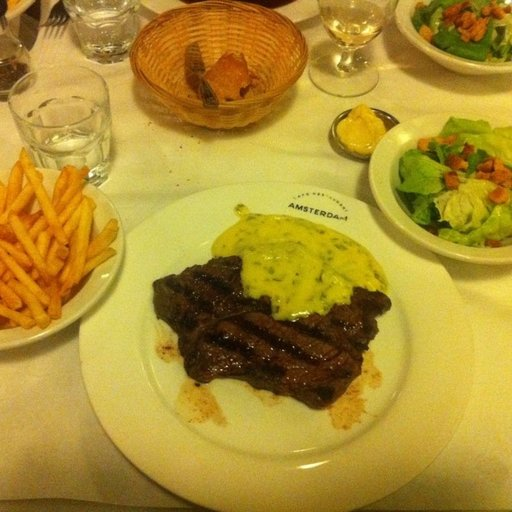

In [70]:
# Visualize an image

import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

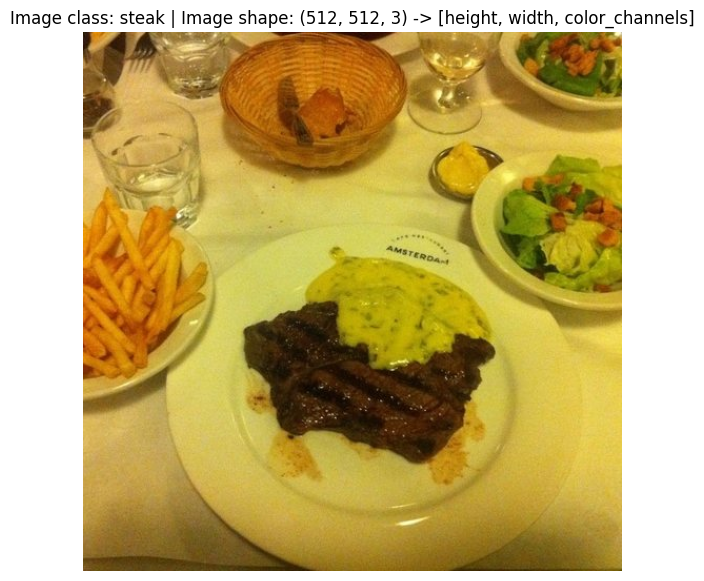

In [71]:
# Do the image visualization with matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [72]:
# 3.1 Transforming data with torchvision.transforms

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms





In [73]:
# Write transform for turning images into tensors

data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])


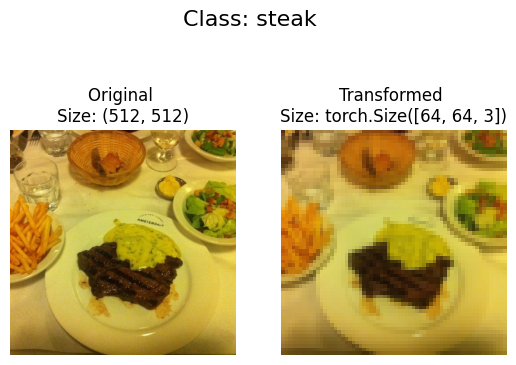

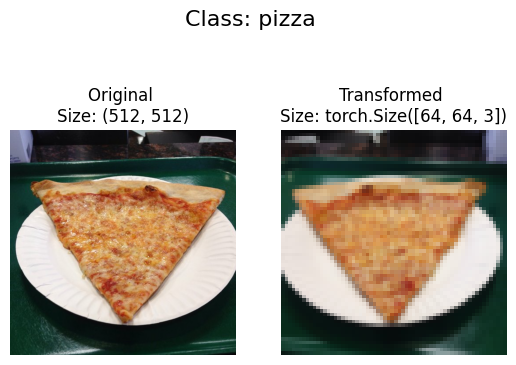

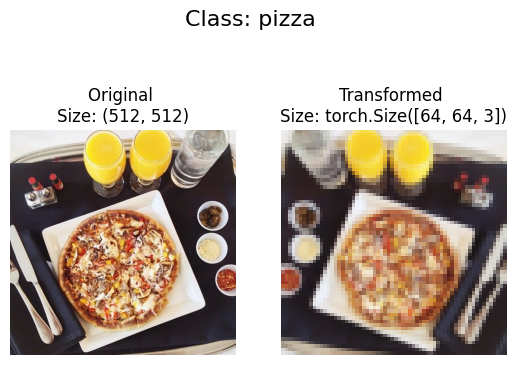

In [74]:
# Write a function to plot transformed images

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)


### Load image data using `ImageFolder`

In [75]:
# Use ImageFolder to create dataset(s)

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [76]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [77]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [78]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [79]:
# Turn train and test Datasets into DataLoaders

from torch.utils.data import DataLoader


train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cda9e737c90>,
 <torch.utils.data.dataloader.DataLoader at 0x7cda91d23bd0>)

In [80]:
# How many batches of images are in our data loaders?

print(f"Dataloader: {len(train_dataloader)} batches of training data")
print(f"Dataloader: {len(test_dataloader)} batches of testing data")


Dataloader: 225 batches of training data
Dataloader: 75 batches of testing data


## 3. Recreate `model_0` we built in section 7 of notebook 04.

## 4. Create training and testing functions for `model_0`.

In [81]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [82]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)


    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()


    # 3. Optimizer zero grad
    optimizer.zero_grad()


    # 4. Loss backward
    loss.backward()


    # 5. Optimizer step
    optimizer.step()


    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)


  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [83]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):

      # Send data to target device
      X, y = X.to(device), y.to(device)


      # 1. Forward pass
      test_pred = model(X)


      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()


      # Calculate and accumulate accuracy
      test_pred_labels = test_pred.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [84]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [85]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1099 | train_acc: 0.2844 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0996 | train_acc: 0.3289 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1125 | train_acc: 0.3244 | test_loss: 1.1033 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0993 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


{'train_loss': [1.1098846779929268,
  1.0996307108137342,
  1.1124977617793612,
  1.0992984268400403,
  1.09870596408844],
 'train_acc': [0.28444444444444444,
  0.3288888888888889,
  0.3244444444444444,
  0.3466666666666667,
  0.3466666666666667],
 'test_loss': [1.1001830863952637,
  1.1005089394251506,
  1.1032824500401814,
  1.1011810207366943,
  1.101694925626119],
 'test_acc': [0.3333333333333333,
  0.3333333333333333,
  0.25333333333333335,
  0.3333333333333333,
  0.3333333333333333]}

In [86]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0990 | train_acc: 0.3333 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333
Epoch: 12 | train_l

{'train_loss': [1.09899982770284,
  1.0987083869510226,
  1.0987667221493191,
  1.0986513805389404,
  1.0986311716503567,
  1.0986657275093927,
  1.0985555288526747,
  1.0985701741112603,
  1.0987527004877726,
  1.0987064043680828,
  1.098856094678243,
  1.0987939214706421,
  1.0988603432973225,
  1.0987821271684435,
  1.0987237728966608,
  1.0988265286551582,
  1.09878867732154,
  1.0987172683080038,
  1.0988611380259197,
  1.0985284037060208],
 'train_acc': [0.3333333333333333,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667],
 'test_loss': [1.1011818965276083,
  1.101328649520874,
  1.1018000268936157,
  1.10161410013834

In [87]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0985 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1026 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333
Epoch: 12 | train_l

{'train_loss': [1.0989262474907768,
  1.0986596912807889,
  1.098732549349467,
  1.0986272112528483,
  1.098614354133606,
  1.09865324444241,
  1.098546839820014,
  1.0985650391048856,
  1.098749008178711,
  1.0987039015028213,
  1.0988532421323989,
  1.0987910996543035,
  1.098859143257141,
  1.0987818347083198,
  1.0987230412165323,
  1.098826101620992,
  1.0987885729471842,
  1.0987174187766182,
  1.0988611364364624,
  1.0985282564163208,
  1.0987767828835382,
  1.0986861038208007,
  1.0986409865485298,
  1.0986774608823988,
  1.0986804681354099,
  1.0987426620059544,
  1.098700508011712,
  1.0987897396087647,
  1.0987342241075304,
  1.099080417421129,
  1.0989780860477023,
  1.0986270390616524,
  1.0987621360354953,
  1.0989505243301392,
  1.0986607101228503,
  1.0987337769402399,
  1.0986996110280354,
  1.0987493318981594,
  1.0987323628531562,
  1.0987086402045356,
  1.0986482461293539,
  1.0985727400249905,
  1.0988661760754055,
  1.0986858420901828,
  1.0985547992918225,
  1.09

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [88]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [89]:
train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 2 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1014 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1015 | test_acc: 0.2533
Epoch: 5 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 6 | train_loss: 1.0985 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 7 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1016 | test_acc: 0.2533
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1016 | test_acc: 0.2533
Epoch: 9 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 10 | train_loss: 1.0984 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 11 | train_loss: 1.0985 | train_acc: 0.3333 | test_loss: 1.1017 | test_acc: 0.2533
Epoch: 12 | train_l

{'train_loss': [1.0984299590852526,
  1.098431208398607,
  1.098370139863756,
  1.0984132295184665,
  1.098433576689826,
  1.0984616634580824,
  1.0984009986453587,
  1.0984292676713732,
  1.0984078195359972,
  1.0983743206659953,
  1.0984539302190144,
  1.0984391117095946,
  1.0984537076950074,
  1.098410111533271,
  1.0984459569719103,
  1.0984070677227444,
  1.0984388441509672,
  1.0984333960215251,
  1.0984460088941785,
  1.0984358771642049],
 'train_acc': [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 'test_loss': [1.101654437383016,
  1.101689853668213,
  1.1014335266749065,
  1.10153206348419

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [90]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [91]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.


Excellent, we now have double the training and testing images...

In [92]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [93]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets

train_data = datasets.ImageFolder(root=train_data_20_percent_path, # target folder of images
                                  transform=simple_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_data_20_percent_path,
                                 transform=simple_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


# Create dataloaders

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader


Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/pizza_steak_sushi_20_percent/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: data/pizza_steak_sushi_20_percent/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


(<torch.utils.data.dataloader.DataLoader at 0x7cda91d47990>,
 <torch.utils.data.dataloader.DataLoader at 0x7cda91d73850>)

In [94]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 2 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 3 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 4 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 6 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 7 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 8 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 11 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 12 | train_l

{'train_loss': [1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217,
  1.0988440412945217],
 'train_acc': [0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444,
  0.3244444444444444],
 'test_loss': [1.0968943492571512,
  1.0968943492571512,
  1.0968943492571512,
  1.09689434

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

data/04-pizza-dad.jpeg already exists, skipping download.
Prediction logits: tensor([[0.0040, 0.0368, 0.0009]], device='cuda:0')
Prediction probabilities: tensor([[0.3300, 0.3410, 0.3290]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


'steak'

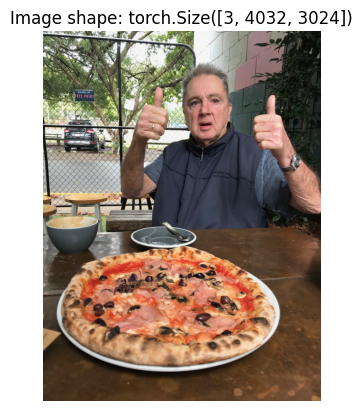

In [97]:
import torchvision

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")



# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))


# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.


# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);


# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)


model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)


    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))


# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class